Maximum Temperature - 31.279999999999973
Minimum Temperature - 19.019999999999982


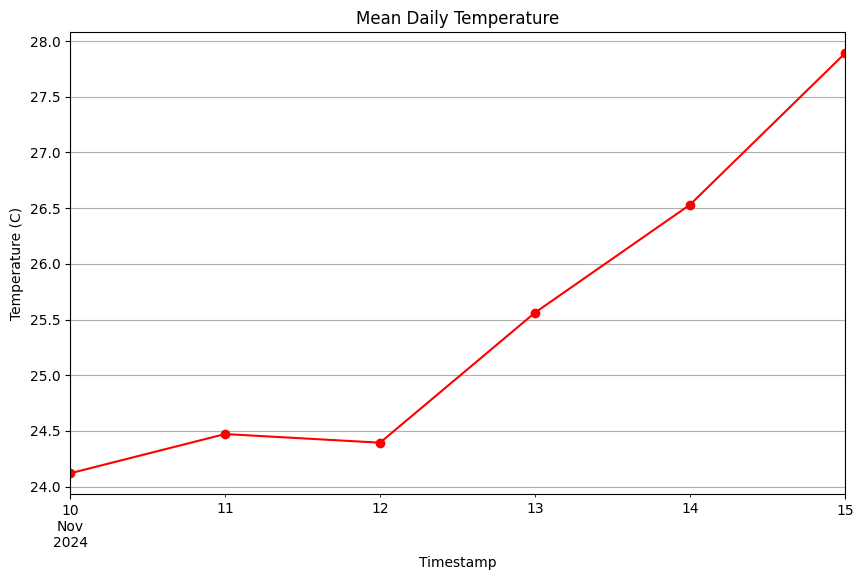

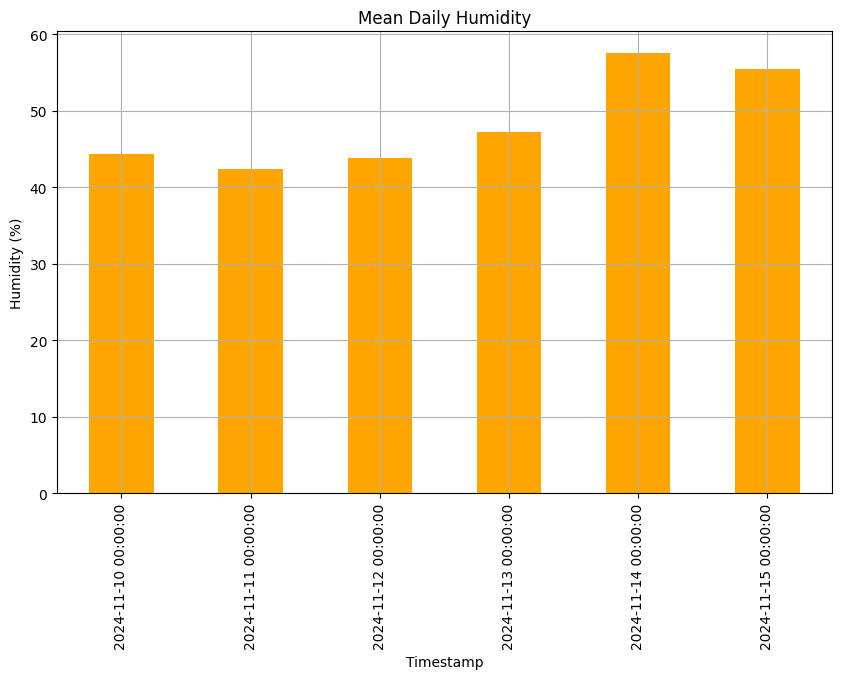

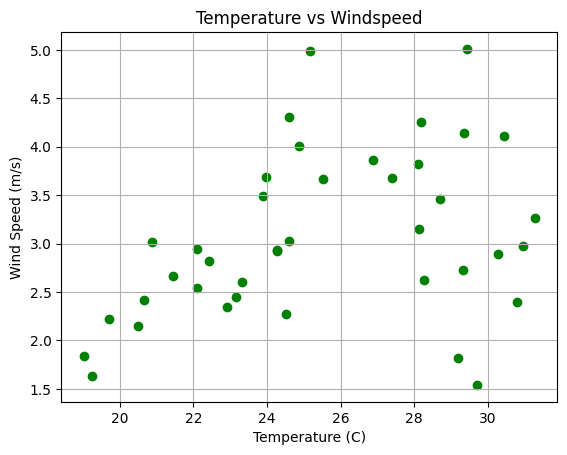

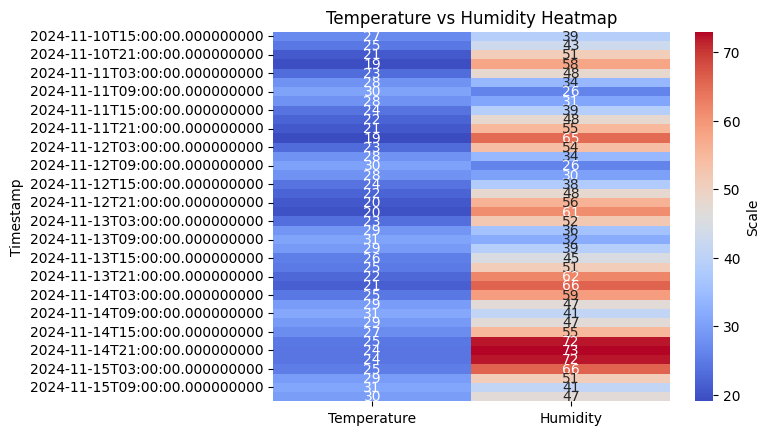

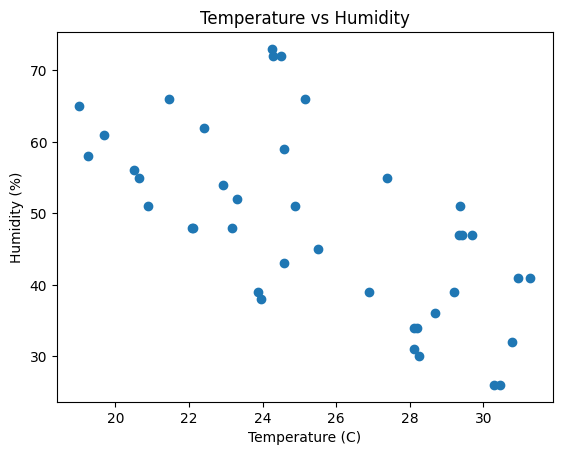

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

api_key = "b16fb2f41b8dbea3d67c9efafbab8e41"
lat, lon = 18.184135, 74.610764
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

# Fetch data
response = requests.get(api_url)
weather_data = response.json()['list']

# Create DataFrame directly from response
weather_df = pd.DataFrame([{
    'Timestamp': pd.to_datetime(item['dt'], unit='s'),
    'Temperature': item['main']['temp'] - 273.16,  # Convert to Celsius
    'Humidity': item['main']['humidity'],
    'Wind Speed': item['wind']['speed'],
    'Weather': item['weather'][0]['description']
} for item in weather_data])

# Set timestamp as index
weather_df.set_index('Timestamp', inplace=True)

# Handle missing data and find max/min temperatures
weather_df.fillna(0, inplace=True)
max_temp, min_temp = weather_df['Temperature'].max(), weather_df['Temperature'].min()
print(f"Maximum Temperature - {max_temp}")
print(f"Minimum Temperature - {min_temp}")

# Resampling: Select only numeric columns before resampling
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed']
daily_mean = weather_df[numeric_columns].resample('D').mean()

# Plot Mean Daily Temperature
daily_mean['Temperature'].plot(figsize=(10, 6), color='red', marker='o', title='Mean Daily Temperature', ylabel='Temperature (C)')
plt.grid(True)
plt.show()

# Plot Mean Daily Humidity
daily_mean['Humidity'].plot(kind='bar', figsize=(10, 6), color='orange', title='Mean Daily Humidity', ylabel='Humidity (%)')
plt.grid(True)
plt.show()

# Scatter plot for Temperature vs Wind Speed
plt.scatter(weather_df['Temperature'], weather_df['Wind Speed'], color='green')
plt.title('Temperature vs Windspeed')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Heatmap for Temperature vs Humidity
sns.heatmap(weather_df[['Temperature', 'Humidity']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Scale'})
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Scatter Plot for Temperature vs Humidity
plt.scatter(weather_df['Temperature'], weather_df['Humidity'])
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.show()
